<a href="https://colab.research.google.com/github/bharadwaj240796/cs666student/blob/main/CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

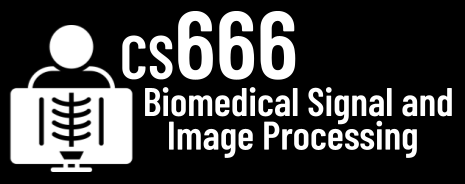

# Assignment 1

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [3]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 4.9 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [4]:
from biosppy import storage
##conencting to google drive 
from google.colab import drive
drive.mount('/content/drive')
signal, metadata = storage.load_txt('/content/drive/MyDrive/ecg.txt')

Mounted at /content/drive


In [5]:
signal

array([2044., 2044., 2044., ..., 2044., 2045., 2043.])

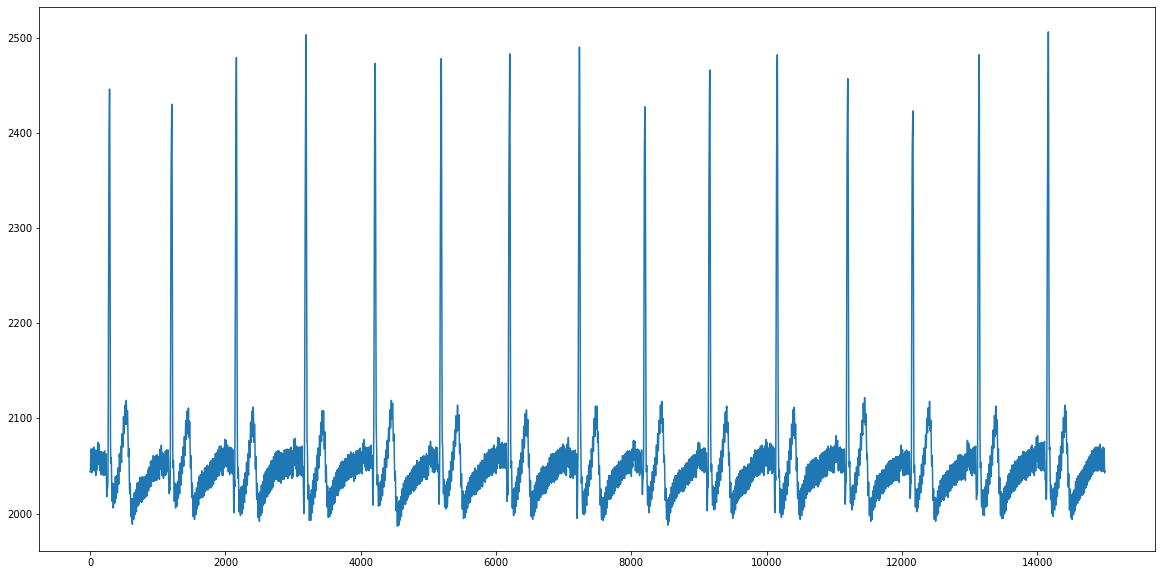

In [6]:
plt.figure(figsize=(20,10))
plt.plot(signal)

In [7]:
metadata

{'sampling_rate': 1000.0, 'resolution': 12, 'labels': ['ECG']}

In [8]:
no_of_signals = len(signal)
print(no_of_signals)

15000


**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [9]:
SAMPLING_RATE = metadata['sampling_rate']
SECONDS = int(no_of_signals / metadata['sampling_rate'])

In [10]:
SAMPLING_RATE

1000.0

In [11]:
SECONDS

15

**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [12]:
### TODO
from biosppy.signals import ecg
output_signals = ecg.ecg(signal=signal, sampling_rate=SAMPLING_RATE, show=False)

In [13]:
output_signals

ReturnTuple(ts=array([0.0000e+00, 1.0000e-03, 2.0000e-03, ..., 1.4997e+01, 1.4998e+01,
       1.4999e+01]), filtered=array([86.59632358, 89.29577068, 91.89768614, ..., 92.65388691,
       89.66260537, 86.55395748]), rpeaks=array([  283,  1204,  2159,  3188,  4211,  5188,  6200,  7232,  8200,
        9157, 10156, 11198, 12159, 13139, 14162]), templates_ts=array([-2.00000000e-01, -1.99000000e-01, -1.98000000e-01, -1.97000000e-01,
       -1.96000000e-01, -1.95000000e-01, -1.94000000e-01, -1.93000000e-01,
       -1.92000000e-01, -1.91000000e-01, -1.90000000e-01, -1.89000000e-01,
       -1.88000000e-01, -1.87000000e-01, -1.86000000e-01, -1.85000000e-01,
       -1.84000000e-01, -1.83000000e-01, -1.82000000e-01, -1.81000000e-01,
       -1.80000000e-01, -1.79000000e-01, -1.78000000e-01, -1.77000000e-01,
       -1.76000000e-01, -1.75000000e-01, -1.74000000e-01, -1.73000000e-01,
       -1.72000000e-01, -1.71000000e-01, -1.70000000e-01, -1.69000000e-01,
       -1.68000000e-01, -1.67000000e-01, -1

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

In [14]:
### TODO plot unfiltered signal
unfiltered_signals = signal
print("Unfiltered Signals : \n",unfiltered_signals)
no_of_unfiltered_signals = len(unfiltered_signals)
print("Number of Unfiltered Signals: \n ",no_of_unfiltered_signals)

Unfiltered Signals : 
 [2044. 2044. 2044. ... 2044. 2045. 2043.]
Number of Unfiltered Signals: 
  15000


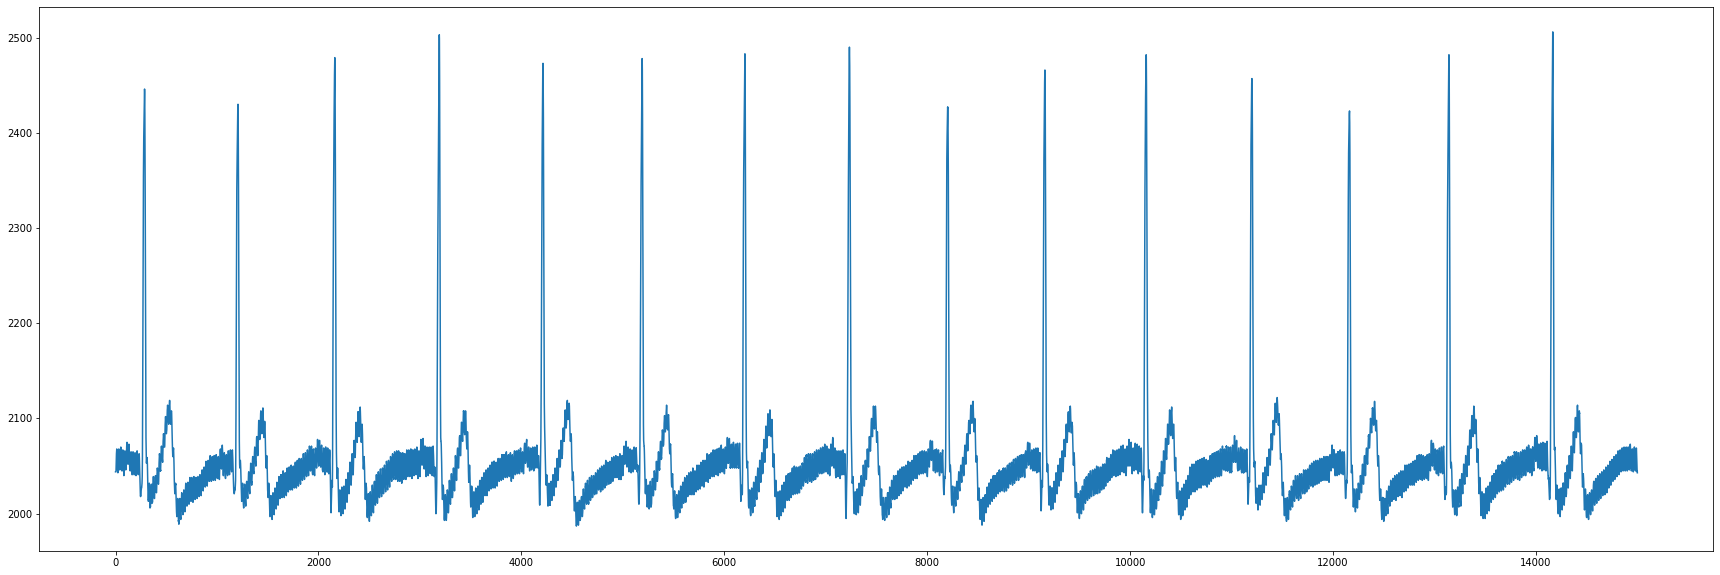

In [15]:
plt.figure(figsize=(30,10))
plt.plot(unfiltered_signals)

In [16]:
starting_time = int (0 * SAMPLING_RATE)
ending_time = int (3* SAMPLING_RATE)

(0.0, 3000.0)

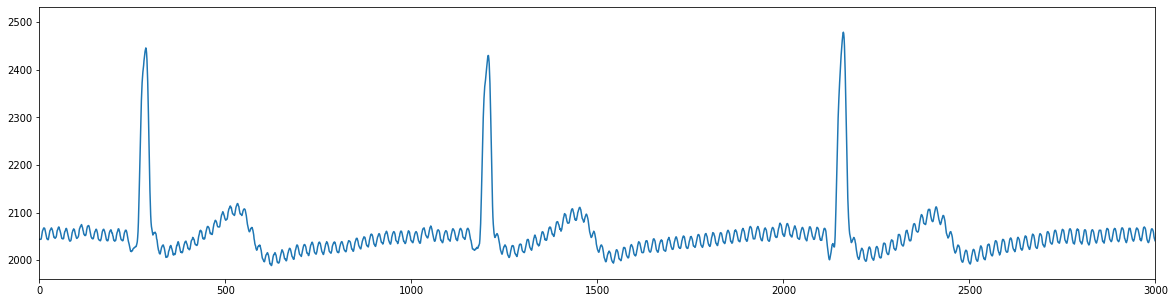

In [17]:
plt.figure(figsize=(20,5))
plt.plot(unfiltered_signals)
plt.xlim(starting_time, ending_time)

In [18]:
### TODO plot filtered signal
filtered_signals = output_signals[1]
print("Filtered Signals : \n",filtered_signals)
no_of_filtered_signals = len(filtered_signals)
print("Number of Filtered Signals: \n ",no_of_filtered_signals)

Filtered Signals : 
 [86.59632358 89.29577068 91.89768614 ... 92.65388691 89.66260537
 86.55395748]
Number of Filtered Signals: 
  15000


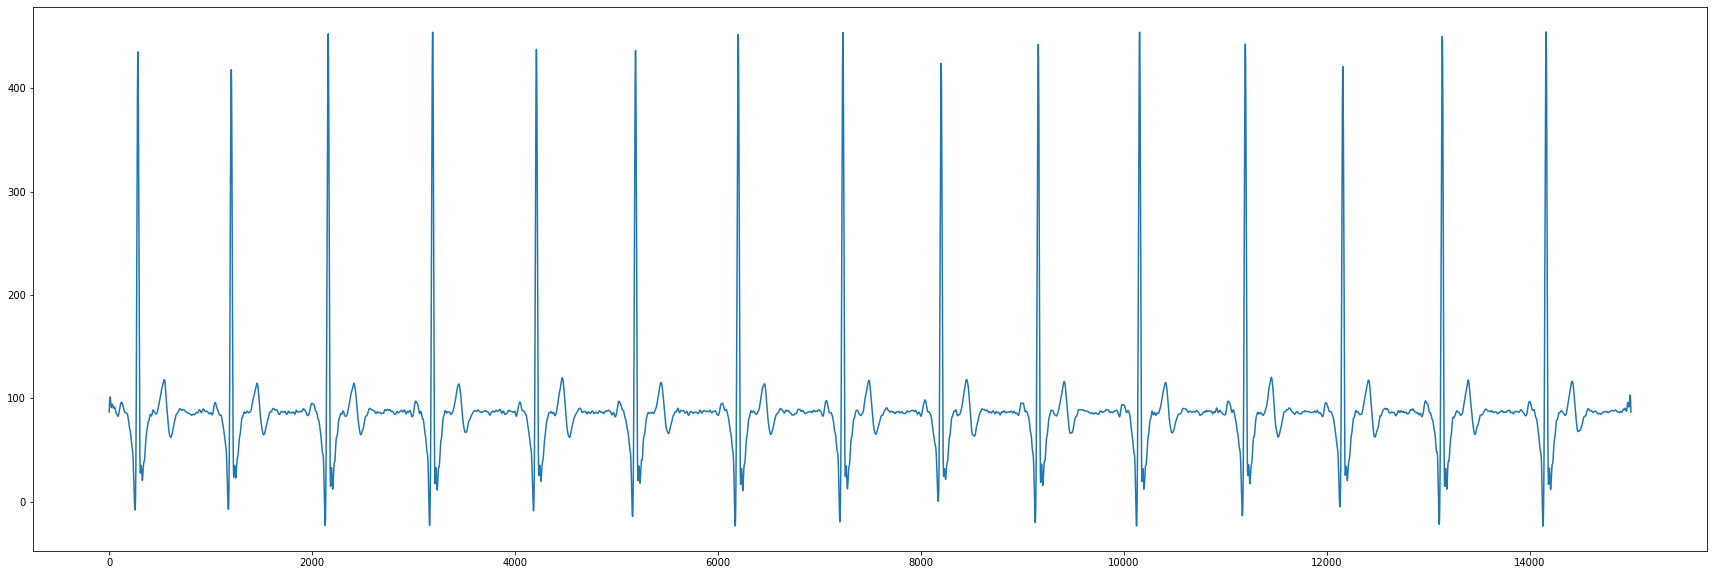

In [19]:
plt.figure(figsize=(30,10))
plt.plot(filtered_signals)

(0.0, 3000.0)

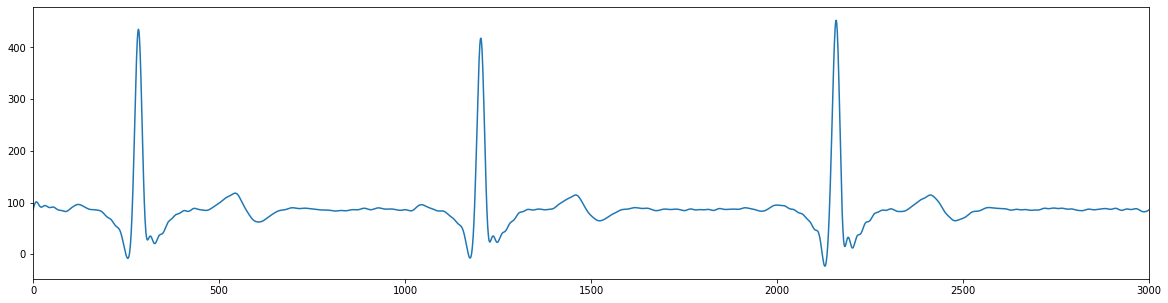

In [20]:
plt.figure(figsize=(20,5))
plt.plot(filtered_signals)
plt.xlim(starting_time, ending_time)

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

In [21]:
### TODO
rpeaks = output_signals[2]
print("Rpeaks : \n",rpeaks)
no_of_rpeaks = len(rpeaks)
print("Number of Rpeaks: \n ",no_of_rpeaks)


Rpeaks : 
 [  283  1204  2159  3188  4211  5188  6200  7232  8200  9157 10156 11198
 12159 13139 14162]
Number of Rpeaks: 
  15


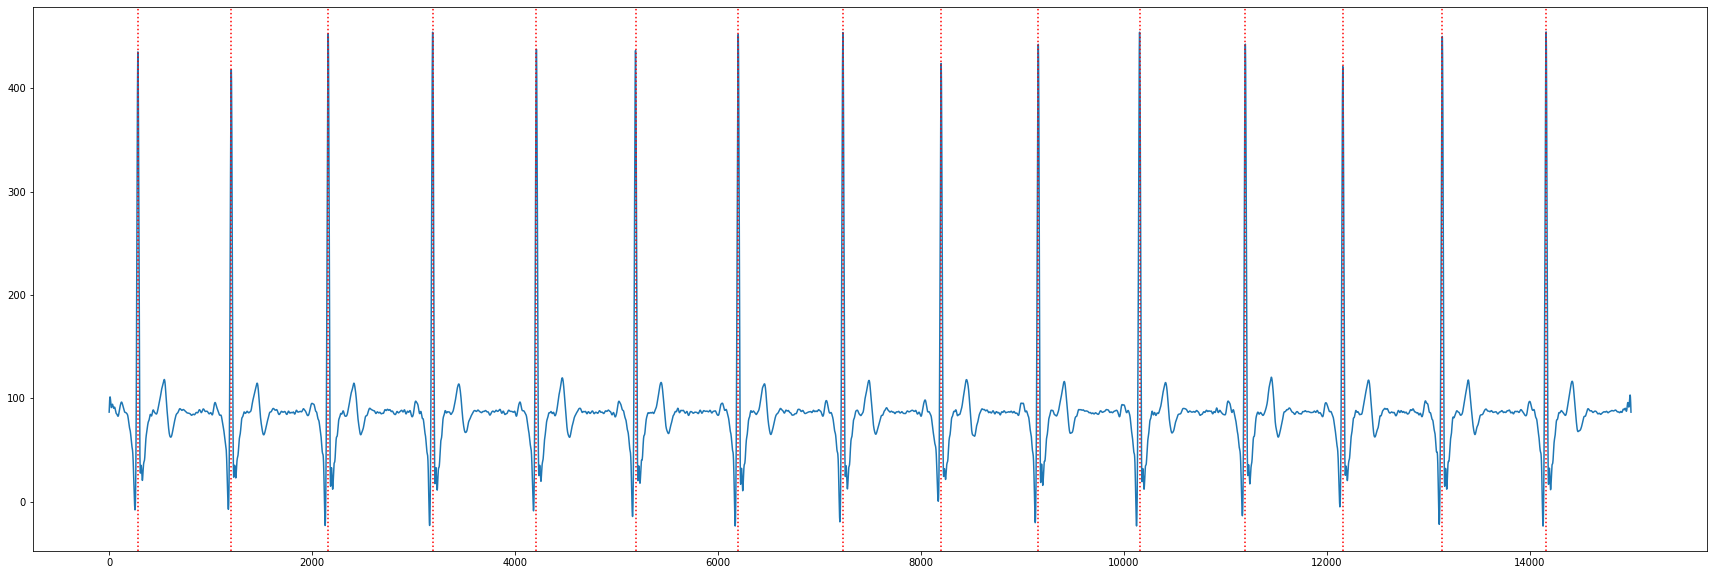

In [22]:
plt.figure(figsize=(30,10))
plt.plot(filtered_signals)
for i in rpeaks:
  plt.axvline(x = i, color = 'r', ls=':')
#plt.xticks(rpeaks)

([<matplotlib.axis.XTick at 0x7f305a2333a0>,
 <a list of 15 Text major ticklabel objects>)

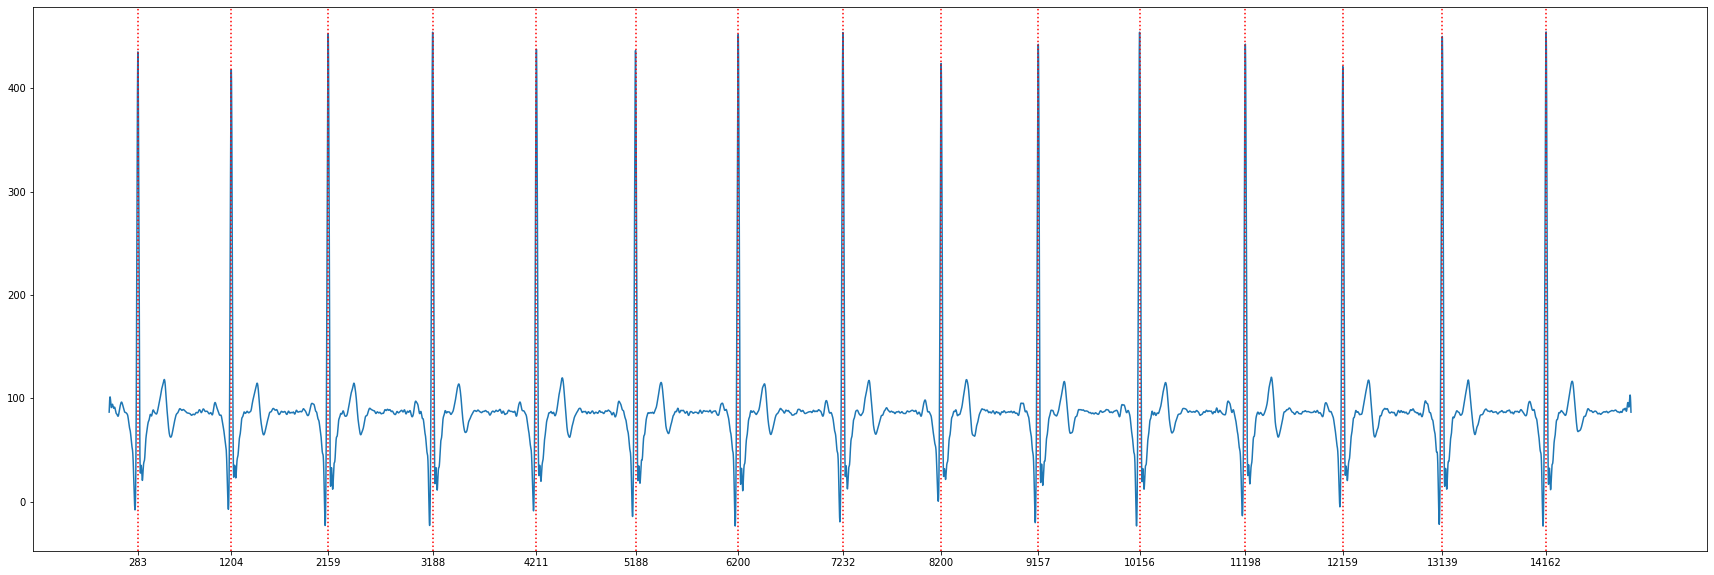

In [23]:
plt.figure(figsize=(30,10))
plt.plot(filtered_signals)
for i in rpeaks:
  plt.axvline(x = i, color = 'r', ls=':')
plt.xticks(rpeaks)

<ipython-input-25-a5738aa0d025>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xticks(signal_length or rpeaks)


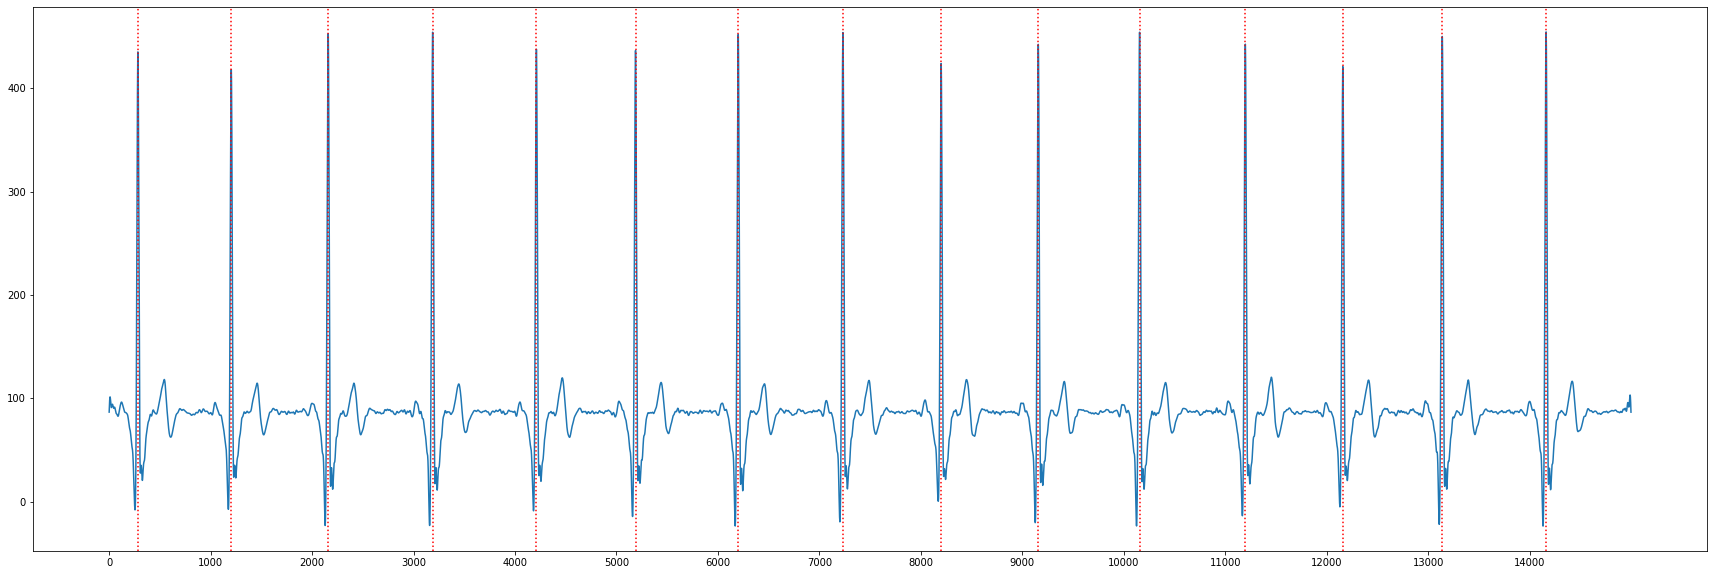

In [25]:
plt.figure(figsize=(30,10))
plt.plot(filtered_signals)
for i in rpeaks:
  plt.axvline(x = i, color = 'r', ls=':')
plt.axes().set_xticks(signal_length or rpeaks)

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [26]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.9 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

In [ ]:
# We know the R spikes now, but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


{'ECG_P_Peaks': [nan, 1052, 1991, 3030, 4051, 5031, 6030, 7069, 8031, 8990, 9989, 11029, 11990, 12969, 14007], 'ECG_Q_Peaks': [nan, 1169, 2124, 3158, 4180, 5158, 6163, 7200, 8164, 9122, 10121, 11162, 12123, 13103, 14133], 'ECG_S_Peaks': [340, 1262, 2221, 3241, 4262, 5259, 6260, 7300, 8261, 9219, 10200, 11259, 12220, 13199, 14218], 'ECG_T_Peaks': [532, 1452, 2410, 3429, 4453, 5431, 6449, 7470, 8451, 9410, 10409, 11449, 12409, 13387, 14409], 'ECG_P_Onsets': [nan, 1035, 1973, 2992, 4033, 4993, 6012, 7051, 8013, 8972, 9971, 10869, 11972, 12951, 13969], 'ECG_T_Offsets': [594, 1513, 2472, 3512, 4533, 5512, 6511, 7551, 8511, 9471, 10470, 11511, 12471, 13450, 14469]}


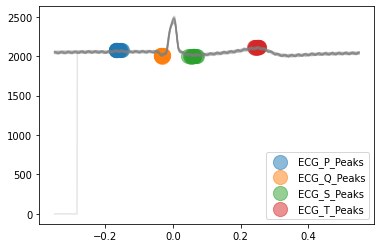

In [30]:
_, waves_peak_unfiltered_signals = nk.ecg_delineate(unfiltered_signals, rpeaks, SAMPLING_RATE, method="peak",show=True,show_type='peaks')
print(waves_peak_unfiltered_signals)

In [34]:
Ppeaks_unfiltered_signals=waves_peak_unfiltered_signals['ECG_P_Peaks']
Qpeaks_unfiltered_signals=waves_peak_unfiltered_signals['ECG_Q_Peaks']
Speaks_unfiltered_signals=waves_peak_unfiltered_signals['ECG_S_Peaks']
Tpeaks_unfiltered_signals=waves_peak_unfiltered_signals['ECG_T_Peaks']
print("Ppeaks Unfiltered Signals : \n", Ppeaks_unfiltered_signals)
print("Qpeaks Unfiltered Signals : \n", Qpeaks_unfiltered_signals)
print("Speaks Unfiltered Signals : \n", Speaks_unfiltered_signals)
print("Tpeaks Unfiltered Signals : \n", Tpeaks_unfiltered_signals)

Ppeaks Unfiltered Signals : 
 [nan, 1052, 1991, 3030, 4051, 5031, 6030, 7069, 8031, 8990, 9989, 11029, 11990, 12969, 14007]
Qpeaks Unfiltered Signals : 
 [nan, 1169, 2124, 3158, 4180, 5158, 6163, 7200, 8164, 9122, 10121, 11162, 12123, 13103, 14133]
Speaks Unfiltered Signals : 
 [340, 1262, 2221, 3241, 4262, 5259, 6260, 7300, 8261, 9219, 10200, 11259, 12220, 13199, 14218]
Tpeaks Unfiltered Signals : 
 [532, 1452, 2410, 3429, 4453, 5431, 6449, 7470, 8451, 9410, 10409, 11449, 12409, 13387, 14409]


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


{'ECG_P_Peaks': [9, 1044, 1999, 3021, 4049, 5024, 6043, 7068, 8042, 8989, 9984, 11029, 11992, 12973, 14000], 'ECG_Q_Peaks': [255, 1175, 2129, 3158, 4182, 5158, 6170, 7202, 8171, 9127, 10126, 11169, 12130, 13109, 14132], 'ECG_S_Peaks': [327, 1248, 2203, 3233, 4255, 5232, 6244, 7276, 8243, 9202, 10200, 11242, 12203, 13183, 14207], 'ECG_T_Peaks': [543, 1459, 2412, 3446, 4466, 5440, 6458, 7489, 8450, 9413, 10412, 11454, 12412, 13395, 14419], 'ECG_P_Onsets': [1016, 1963, 2992, 4020, 4996, 6003, 7037, 8007, 8960, 9957, 10998, 11960, 12946, 13965], 'ECG_T_Offsets': [601, 1511, 2468, 3499, 4528, 5499, 6509, 7546, 8504, 9470, 10461, 11507, 12471, 13455, 14467]}


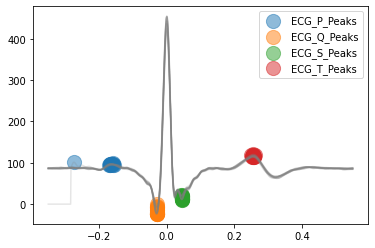

In [31]:
_, waves_peak_filtered_signals = nk.ecg_delineate(filtered_signals, rpeaks, SAMPLING_RATE, method="peak",show=True,show_type='peaks')
print(waves_peak_filtered_signals)

In [35]:
Ppeaks_filtered_signals=waves_peak_filtered_signals['ECG_P_Peaks']
Qpeaks_filtered_signals=waves_peak_filtered_signals['ECG_Q_Peaks']
Speaks_filtered_signals=waves_peak_filtered_signals['ECG_S_Peaks']
Tpeaks_filtered_signals=waves_peak_filtered_signals['ECG_T_Peaks']
print("Ppeaks Filtered Signals : \n", Ppeaks_filtered_signals)
print("Qpeaks Filtered Signals : \n", Qpeaks_filtered_signals)
print("Speaks Filtered Signals : \n", Speaks_filtered_signals)
print("Tpeaks Filtered Signals : \n", Tpeaks_filtered_signals)

Ppeaks Filtered Signals : 
 [9, 1044, 1999, 3021, 4049, 5024, 6043, 7068, 8042, 8989, 9984, 11029, 11992, 12973, 14000]
Qpeaks Filtered Signals : 
 [255, 1175, 2129, 3158, 4182, 5158, 6170, 7202, 8171, 9127, 10126, 11169, 12130, 13109, 14132]
Speaks Filtered Signals : 
 [327, 1248, 2203, 3233, 4255, 5232, 6244, 7276, 8243, 9202, 10200, 11242, 12203, 13183, 14207]
Tpeaks Filtered Signals : 
 [543, 1459, 2412, 3446, 4466, 5440, 6458, 7489, 8450, 9413, 10412, 11454, 12412, 13395, 14419]


In [ ]:
# TODO Does the detection work well?

# No, the detection for unfiltered signals didn't work well. To compare and for further analysis we have also plotted a plot for filtered signals where we can observe detection worked well.

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal

In [39]:
_, rpeaks_nk = nk.ecg_peaks(signal, SAMPLING_RATE)
print(rpeaks_nk)

{'ECG_R_Peaks': array([ 1206,  2161,  3191,  4212,  5190,  6203,  7233,  8201,  9160,
       10158, 11200, 12161, 13142, 14165]), 'sampling_rate': 1000.0}


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


{'ECG_P_Peaks': [1052, 1991, 3030, 4051, 5031, 6030, 7069, 8031, 8990, 9989, 11029, 11990, 12969, 14007], 'ECG_Q_Peaks': [1169, 2124, 3158, 4180, 5158, 6163, 7200, 8164, 9122, 10121, 11162, 12123, 13103, 14133], 'ECG_S_Peaks': [1262, 2221, 3241, 4262, 5259, 6260, 7300, 8261, 9219, 10200, 11259, 12220, 13199, 14218], 'ECG_T_Peaks': [1452, 2410, 3429, 4453, 5431, 6449, 7470, 8451, 9410, 10409, 11449, 12409, 13387, 14409], 'ECG_P_Onsets': [1035, 1973, 2992, 4033, 4993, 6012, 7051, 8013, 8972, 9971, 10869, 11972, 12951, 13969], 'ECG_T_Offsets': [1513, 2472, 3512, 4533, 5512, 6511, 7551, 8511, 9471, 10470, 11511, 12471, 13450, 14469]}


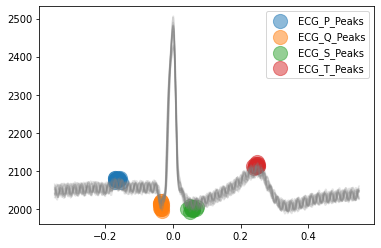

In [40]:
_, peak_whole_unfiltered_signals = nk.ecg_delineate(unfiltered_signals, rpeaks_nk, SAMPLING_RATE, method="peak",show=True,show_type='peaks')
print(peak_whole_unfiltered_signals)

{'ECG_P_Peaks': [1044, 1999, 3021, 4049, 5024, 6043, 7068, 8042, 8989, 9984, 11029, 11992, 12973, 14000], 'ECG_Q_Peaks': [1175, 2129, 3158, 4182, 5158, 6170, 7202, 8171, 9127, 10126, 11169, 12130, 13109, 14132], 'ECG_S_Peaks': [1248, 2203, 3233, 4255, 5232, 6244, 7276, 8243, 9202, 10200, 11242, 12203, 13183, 14207], 'ECG_T_Peaks': [1459, 2412, 3446, 4466, 5440, 6458, 7489, 8450, 9413, 10412, 11454, 12412, 13395, 14419], 'ECG_P_Onsets': [1016, 1963, 2992, 4020, 4996, 6003, 7037, 8007, 8960, 9957, 10998, 11960, 12946, 13965], 'ECG_T_Offsets': [1511, 2468, 3499, 4528, 5499, 6509, 7546, 8504, 9470, 10461, 11507, 12471, 13455, 14467]}


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


<Figure size 1440x360 with 0 Axes>

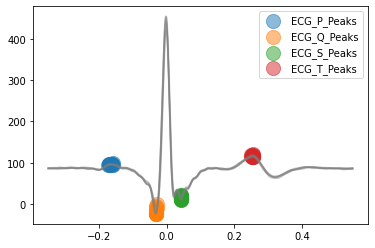

In [60]:
_, peak_whole_filtered_signals = nk.ecg_delineate(filtered_signals, rpeaks_nk, SAMPLING_RATE, method="peak",show=True,show_type='peaks')
print(peak_whole_filtered_signals)

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

[ 4.68512332  4.45195044  4.48606849 ... 24.65113986 23.24937914
 22.16409183]


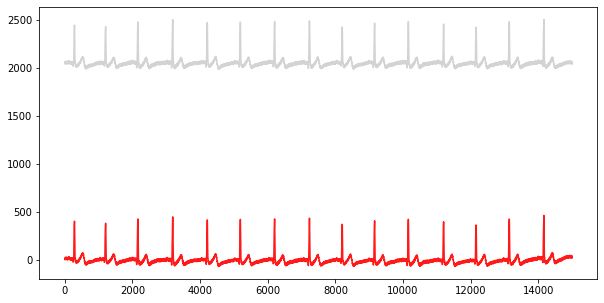

In [57]:
plt.figure(figsize=(10,5))
bandpass_unfiltered_signal = nk.signal_filter(unfiltered_signals,SAMPLING_RATE, lowcut=0.1, highcut=100,show=True)
print(bandpass_unfiltered_signal)

[ 4.48007285  7.14931145  9.72242995 ... 19.25846692 16.31145337
 13.24819357]


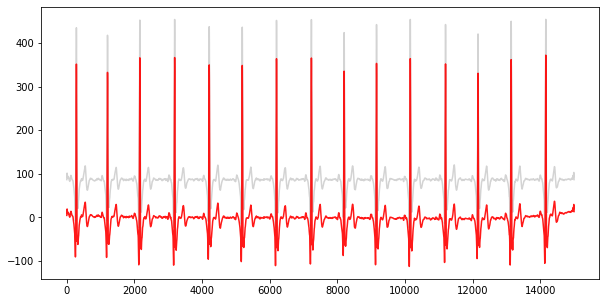

In [62]:
plt.figure(figsize=(10,5))
bandpass_filtered_signal = nk.signal_filter(filtered_signals, SAMPLING_RATE,lowcut=0.1, highcut=100,show=True)
print(bandpass_filtered_signal)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


{'ECG_P_Peaks': [1044, 1999, 3021, 4049, 5024, 6043, 7068, 8042, 8989, 9984, 11029, 11992, 12973, 14000], 'ECG_Q_Peaks': [1175, 2129, 3158, 4182, 5158, 6170, 7202, 8171, 9127, 10126, 11169, 12130, 13109, 14132], 'ECG_S_Peaks': [1248, 2203, 3233, 4255, 5232, 6244, 7276, 8243, 9202, 10200, 11242, 12203, 13183, 14207], 'ECG_T_Peaks': [1459, 2412, 3446, 4466, 5440, 6458, 7489, 8450, 9413, 10412, 11454, 12412, 13395, 14419], 'ECG_P_Onsets': [1016, 1963, 2992, 4020, 4996, 6003, 7037, 8007, 8960, 9957, 10998, 11960, 12946, 13965], 'ECG_T_Offsets': [1511, 2468, 3499, 4528, 5499, 6509, 7546, 8504, 9470, 10461, 11507, 12471, 13455, 14467]}


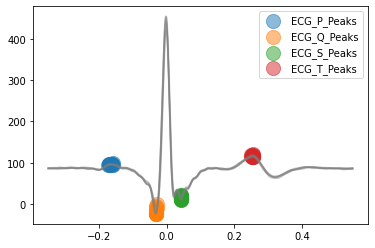

In [61]:
# Finally, run the delineation on the filtered signal from BioSPPY.
_, peak_whole_filtered_signals = nk.ecg_delineate(filtered_signals, rpeaks_nk, SAMPLING_RATE, method="peak",show=True,show_type='peaks')
print(peak_whole_filtered_signals)

In [ ]:
# TODO Which one works the best?

# The filtered signals worked well than the unfiltered signals both in BioSPPY and NeuroKit.

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#